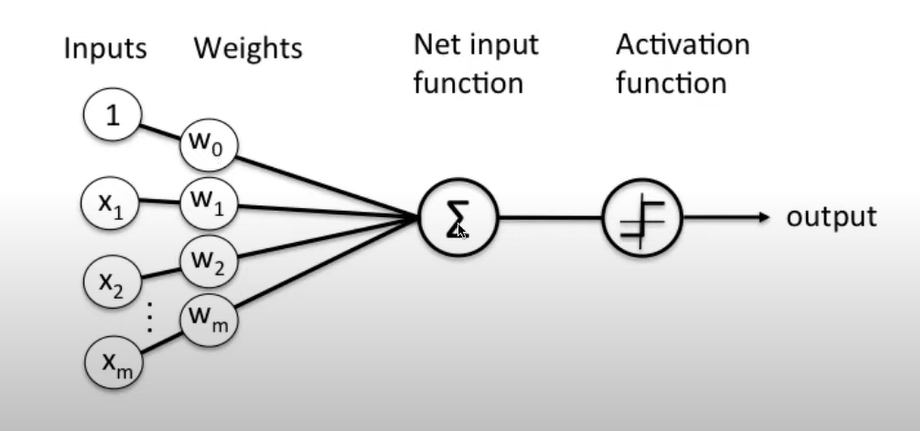

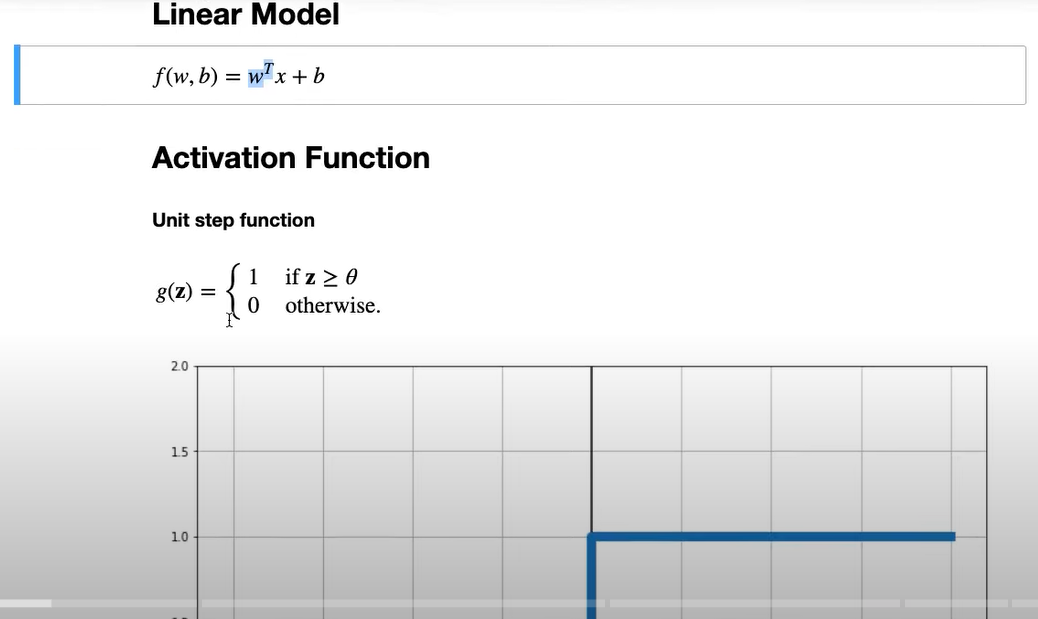

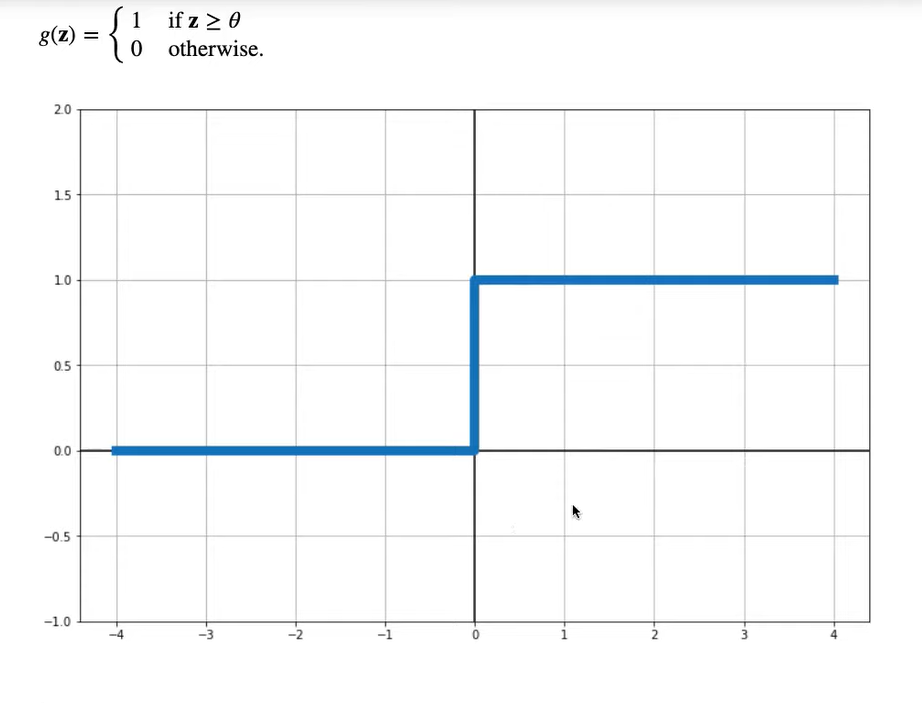

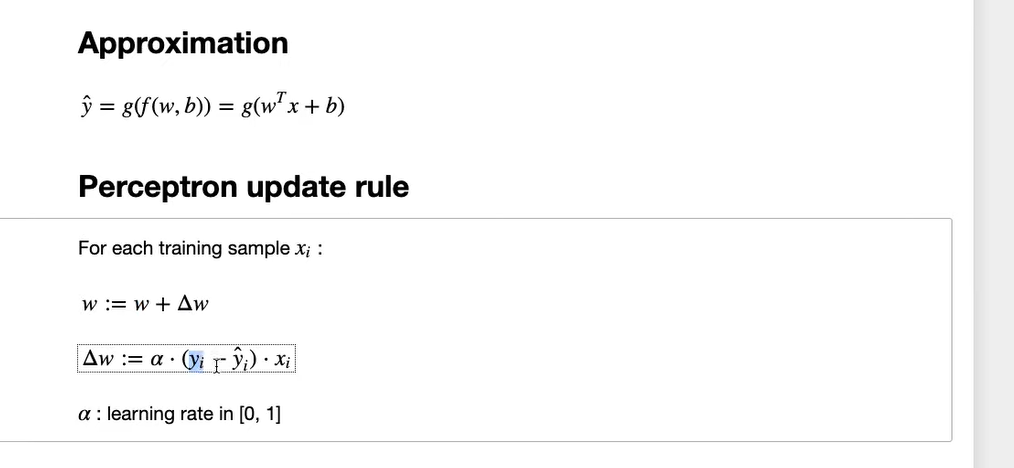

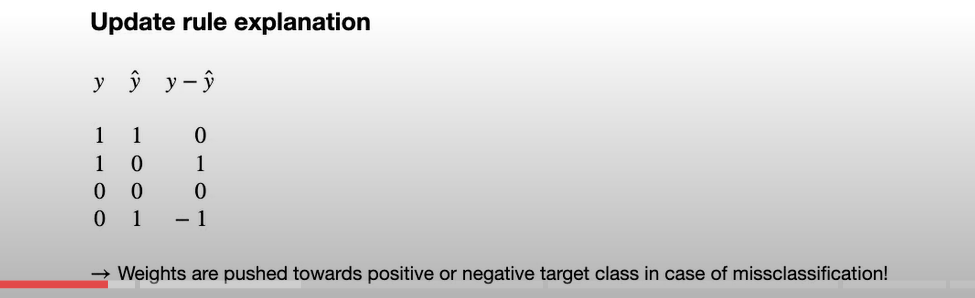

In [1]:
import numpy as np

In [5]:
class Perceptron:
    def __init__(self,lr=0.01,n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.activation_fn = self._unit_step_fn
        
        self.w = None
        self.b = None
        
    def fit(self,X,y):
        n_samples, n_features = X.shape
        
        #init weights
        self.w = np.zeros(n_features)
        self.b = 0
        
        y_ = np.array([1 if i>0 else 0 for i in y])
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i,self.w) + self.b
                y_pred = self.activation_fn(linear_output)
                
                update = self.lr * (y_[idx] - y_pred)
                
                self.w += update * x_i
                self.b += update
        
    
    def predict(self,X):
        linear_output = np.dot(X,self.w) + self.b 
        y_preds = self.activation_fn(linear_output)
        return y_preds
    
    def _unit_step_fn(self,x):
        #return 1 if x >=0 else 0 #this will work for 1 sample.
        #but we need to apply for more than 1 sample
        return np.where(x>=0,1,0)
        

In [3]:
import sklearn
from sklearn import datasets

bc = datasets.load_breast_cancer()

X,y = bc.data,bc.target


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [6]:
clf = Perceptron()
clf.fit(X_train,y_train)
preds = clf.predict(X_test)

In [7]:
acc = np.sum(preds == y_test) /len(y_test) 
acc

0.8881118881118881